In [40]:
import matplotlib.pyplot as plt
import pycaret as pc
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler



from sklearn.metrics import classification_report, accuracy_score

# NUMBER 1

In [26]:
df=pd.read_csv('Airline_satisfication_data.csv')

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer_Type,Age,types_of_travel,Class,Flight_Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Variabel pada Dataset Kepuasan Penumpang Maskapai

Dataset ini berisi informasi mengenai penumpang maskapai dan tingkat kepuasan mereka. Berikut adalah deskripsi setiap variabel:
- **id**: Identitas unik untuk setiap penumpang.
- **Gender**: Jenis kelamin penumpang (Laki-laki/Perempuan).
- **Customer_Type**: Menunjukkan apakah penumpang merupakan pelanggan loyal atau tidak loyal.
- **Age**: Usia penumpang.
- **types_of_travel**: Tujuan perjalanan (misal: Perjalanan Bisnis, Perjalanan Pribadi).
- **Class**: Kelas penerbangan (misal: Ekonomi, Eco Plus, Bisnis).
- **Flight_Distance**: Jarak penerbangan dalam mil.
- **Inflight wifi service**: Penilaian layanan wifi di pesawat (1 = terendah, 5 = tertinggi).
- **Departure/Arrival time convenient**: Penilaian kenyamanan waktu keberangkatan/kedatangan.
- **Ease_of_Online_booking**: Penilaian kemudahan pemesanan online.
- **Gate location**: Penilaian lokasi gate.
- **Food and drink**: Penilaian layanan makanan dan minuman.
- **Online boarding**: Penilaian proses boarding online.
- **Seat comfort**: Penilaian kenyamanan kursi.
- **Inflight entertainment**: Penilaian hiburan di pesawat.
- **On-board service**: Penilaian layanan secara keseluruhan di pesawat.
- **Leg room service**: Penilaian ruang kaki.
- **Baggage handling**: Penilaian penanganan bagasi.
- **Checkin service**: Penilaian layanan check-in.
- **Inflight service**: Penilaian layanan di dalam pesawat.
- **Cleanliness**: Penilaian kebersihan.
- **Departure Delay in Minutes**: Keterlambatan keberangkatan dalam menit.
- **Arrival Delay in Minutes**: Keterlambatan kedatangan dalam menit.
- **satisfaction**: Tingkat kepuasan penumpang (misal: "puas", "netral atau tidak puas").

In [27]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer_Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   types_of_travel                    103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight_Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease_of_Online_booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [6]:
df.describe()

,id,Age,Flight_Distance,Inflight wifi service,Departure/Arrival time convenient,Ease_of_Online_booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [28]:
df.head(2)

,id,Gender,Customer_Type,Age,types_of_travel,Class,Flight_Distance,Inflight wifi service,Departure/Arrival time convenient,Ease_of_Online_booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [30]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Customer_Type'] = df['Customer_Type'].map({'disloyal Customer': 0, 'Loyal Customer': 1})
df['types_of_travel'] = df['types_of_travel'].map({'Business travel': 0, 'Personal Travel': 1})
df['Class'] = df['Class'].map({'Eco': 0, 'Business': 2, 'Eco Plus': 1})

In [31]:
df.head()

,id,Gender,Customer_Type,Age,types_of_travel,Class,Flight_Distance,Inflight wifi service,Departure/Arrival time convenient,Ease_of_Online_booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,1,1,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,0,25,0,2,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,1,26,0,2,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,1,25,0,2,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,1,61,0,2,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


# PRE PROCESSING DATA

In [32]:
# 1. Handle missing values
# Check missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
types_of_travel                        0
Class                                  0
Flight_Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease_of_Online_booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                 

In [33]:
# For 'Arrival Delay in Minutes' (numerical), fill missing values with the median
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

In [34]:
# 2. Drop irrelevant columns
# 'id' is just an identifier, so we drop it
df = df.drop(columns=['id'])

# EDA

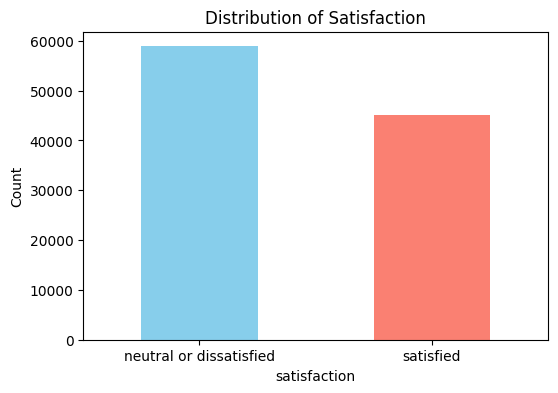

In [35]:
# 1. Distribution of Target Variable
plt.figure(figsize=(6,4))
df['satisfaction'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Satisfaction')
plt.xticks(ticks=[0,1], labels=['neutral or dissatisfied', 'satisfied'], rotation=0)
plt.ylabel('Count')
plt.show()

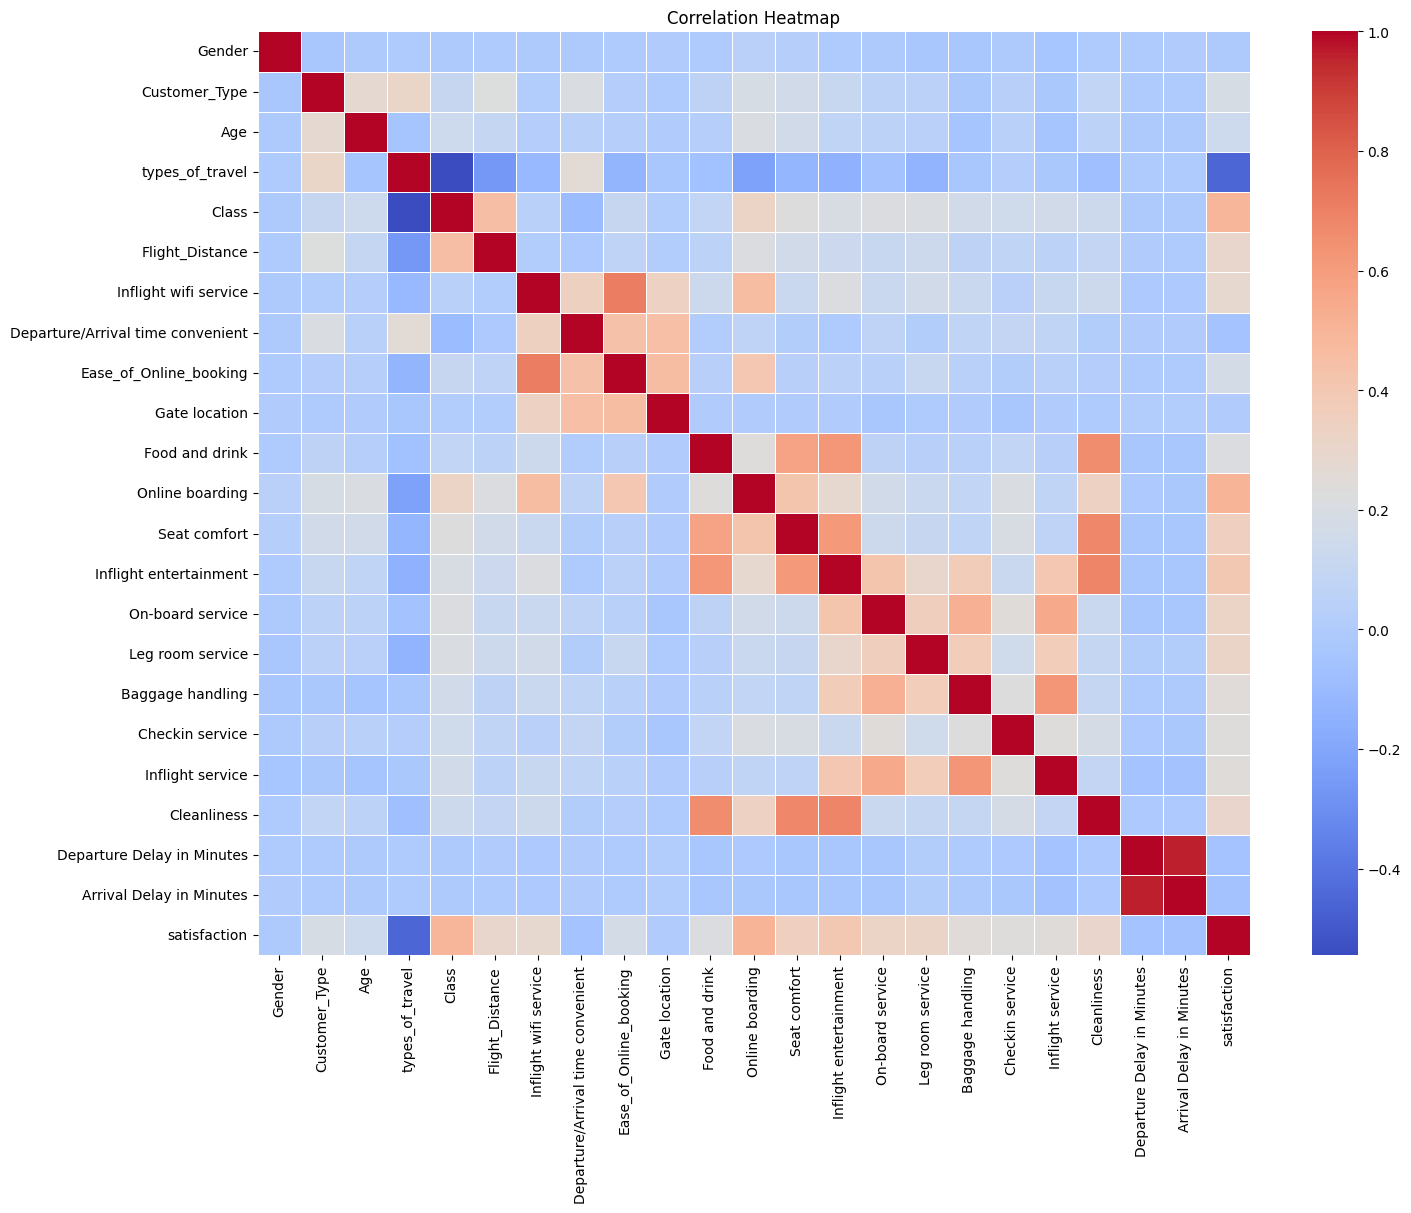

In [36]:
# 2. Correlation Heatmap
plt.figure(figsize=(16,12))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

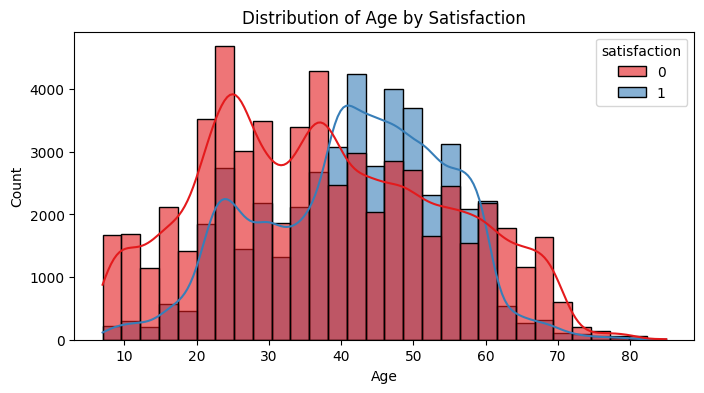

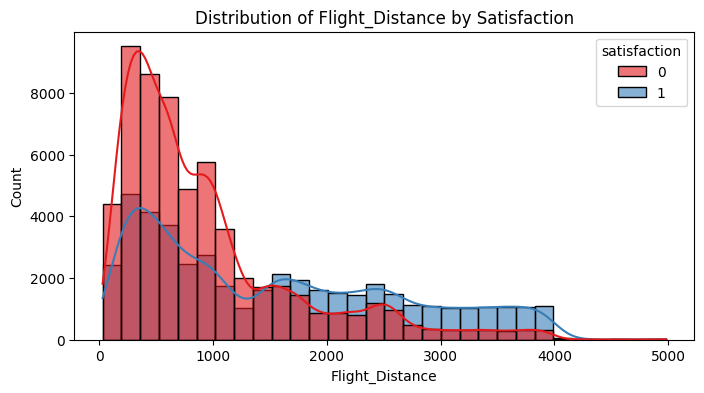

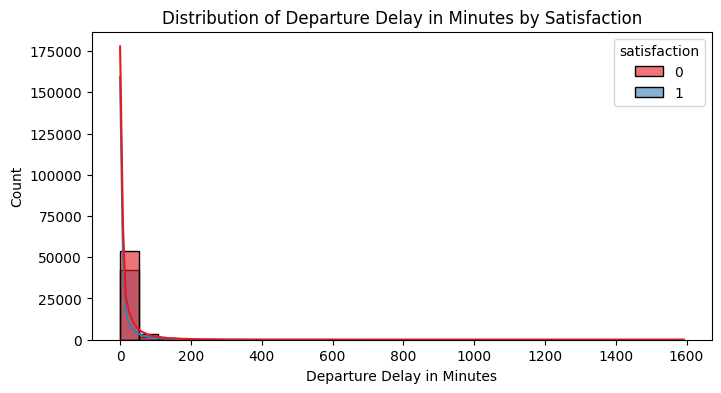

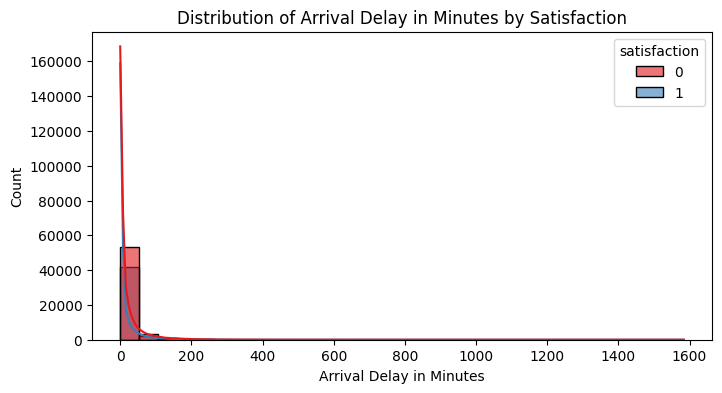

In [37]:
# 3. Feature Distributions by Satisfaction
features = ['Age', 'Flight_Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for col in features:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, hue='satisfaction', bins=30, kde=True, palette='Set1', alpha=0.6)
    plt.title(f'Distribution of {col} by Satisfaction')
    plt.show()

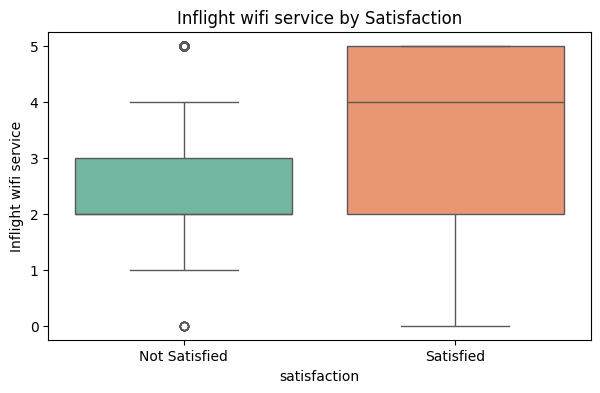

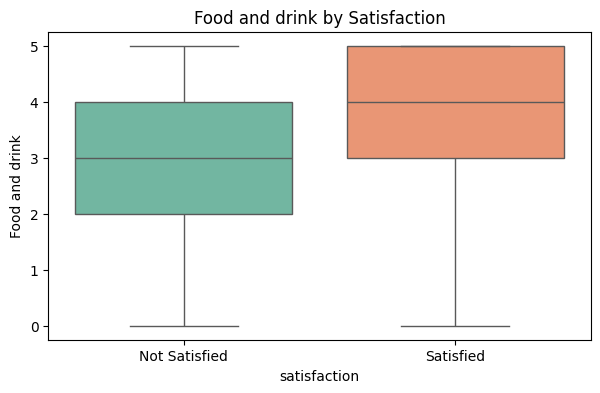

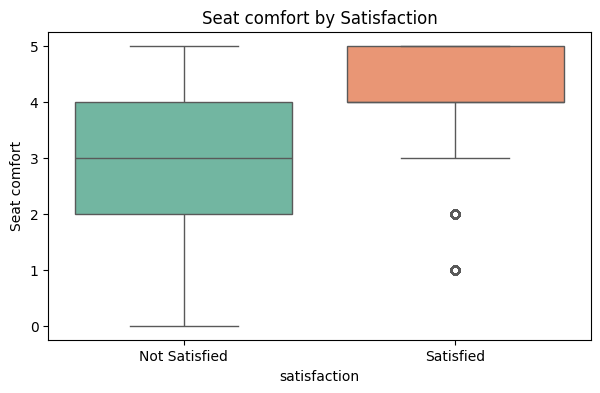

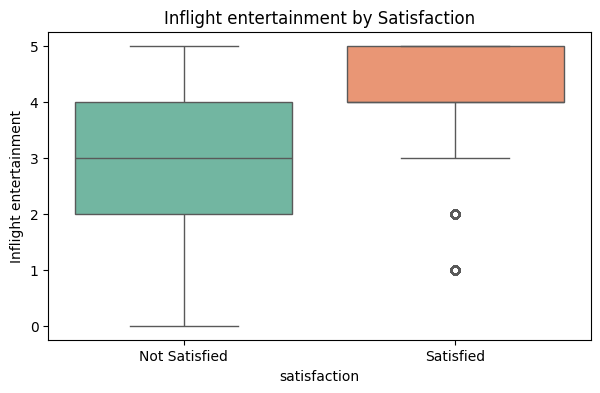

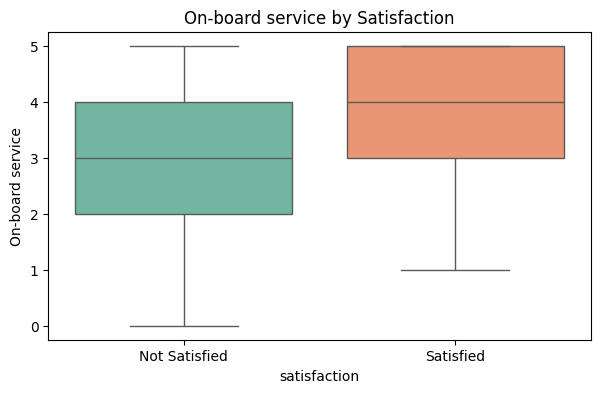

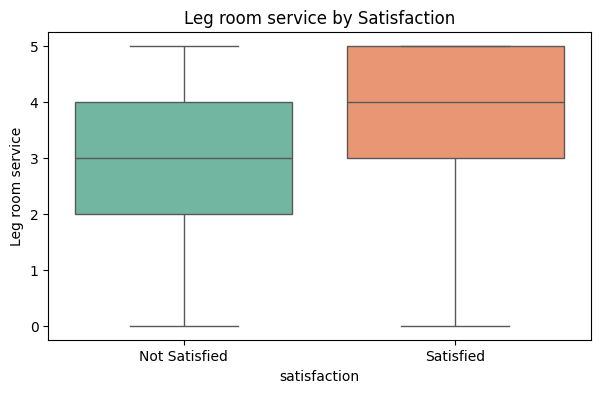

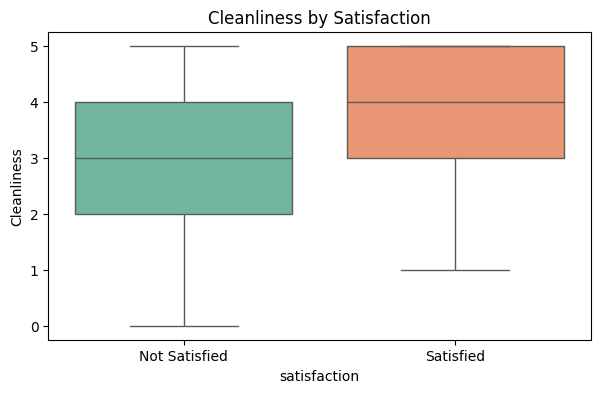

In [38]:
# 4. Boxplots for Service Ratings by Satisfaction
service_cols = ['Inflight wifi service', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Cleanliness']
for col in service_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='satisfaction', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Satisfaction')
    plt.xticks(ticks=[0,1], labels=['Not Satisfied', 'Satisfied'])
    plt.show()

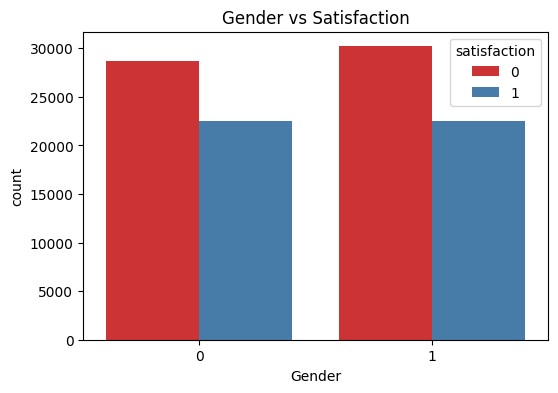

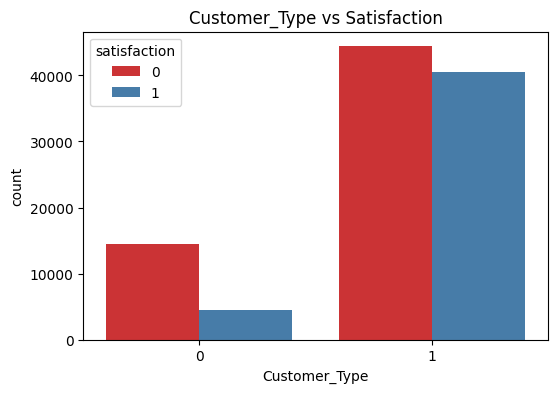

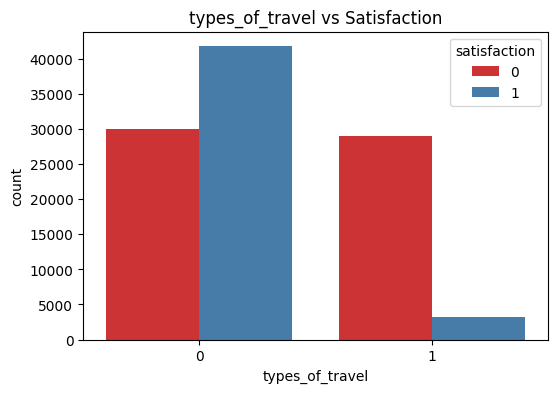

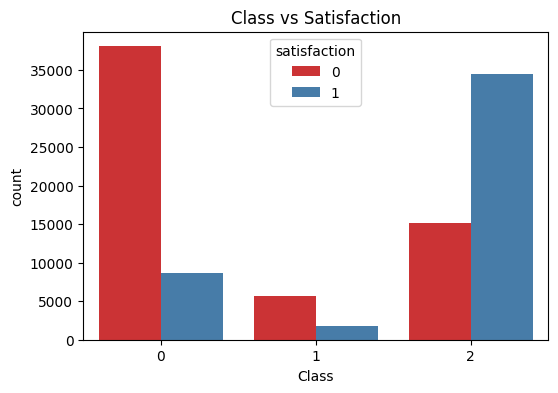

In [39]:
# 5. Categorical Feature Analysis
cat_features = ['Gender', 'Customer_Type', 'types_of_travel', 'Class']
for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='satisfaction', data=df, palette='Set1')
    plt.title(f'{col} vs Satisfaction')
    plt.xticks(rotation=0)
    plt.show()


# MODELLING

# DECISION TREE

In [41]:
# Decision Tree Modelling with Explanation and Hyperparameter Tuning

# 1. Split the data into features (X) and target (y)
X = df.drop(['satisfaction', 'Arrival Delay in Minutes'], axis=1)
y = df['satisfaction']

In [42]:
# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
# 3. Build a baseline Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
# 4. Evaluate baseline model
y_pred = dt.predict(X_test)
print("Baseline Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

Baseline Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11776
           1       0.93      0.94      0.94      9005

    accuracy                           0.95     20781
   macro avg       0.94      0.95      0.94     20781
weighted avg       0.95      0.95      0.95     20781



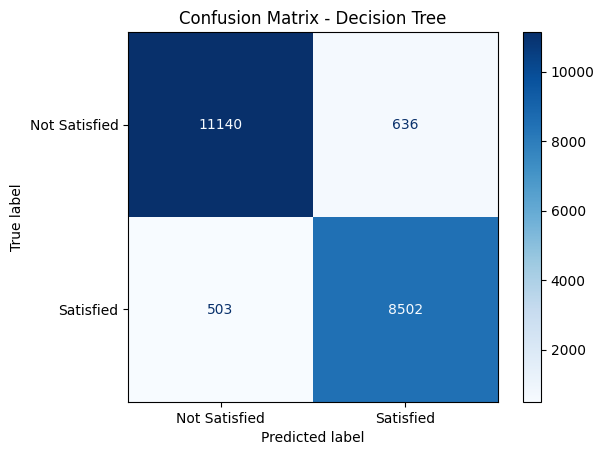

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Satisfied', 'Satisfied'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

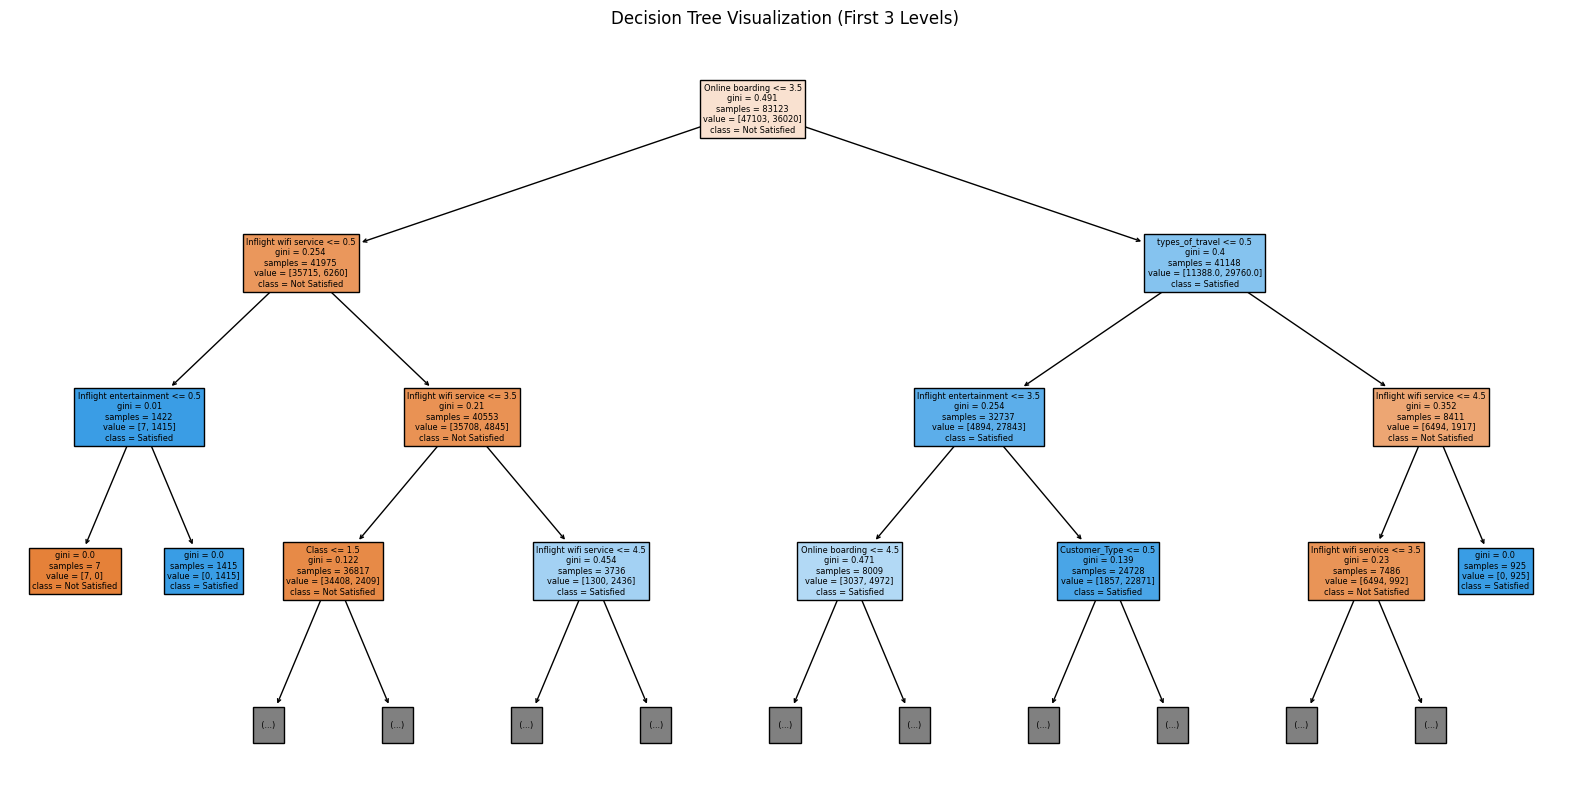

In [46]:
# 7. Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=X.columns, class_names=['Not Satisfied', 'Satisfied'], filled=True, max_depth=3)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

In [47]:
# 5. Hyperparameter tuning using GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [48]:
# 6. Evaluate the best model
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print("Tuned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best))

Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11776
           1       0.95      0.94      0.94      9005

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



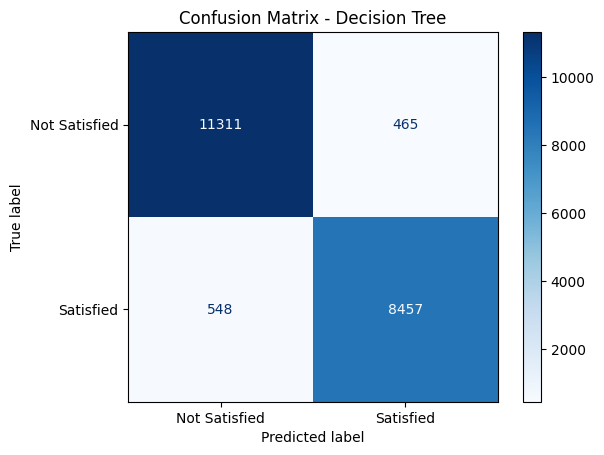

In [49]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Satisfied', 'Satisfied'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

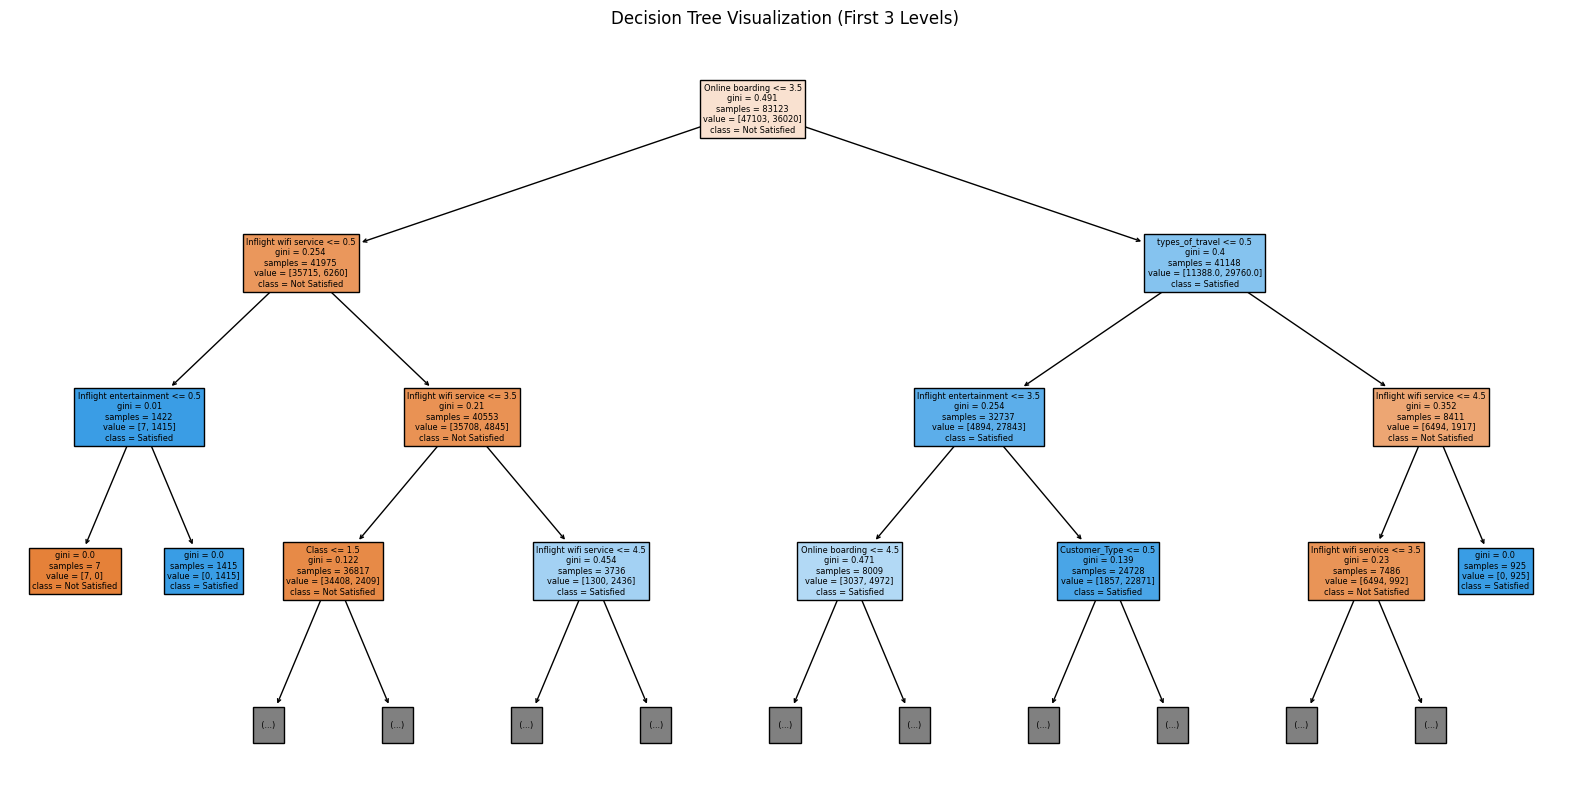

In [50]:
# 7. Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt, feature_names=X.columns, class_names=['Not Satisfied', 'Satisfied'], filled=True, max_depth=3)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()